### 1. Data Preparation
* First, download the dataset and prepare it for training. Here’s how you can do it:

#### 1. Dataset Download
* You can use the Kaggle API to download the dataset. Ensure you have the Kaggle API installed and configured. Here’s how to download the dataset:

In [23]:
pip install  torchvision


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
torchattacks 3.5.1 requires requests~=2.25.1, but you have requests 2.32.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
kaggle datasets download -d sushantp/processed-change-detection-dataset


SyntaxError: invalid syntax (733764324.py, line 1)

In [7]:
import os

directory = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection/'
files = os.listdir(directory)
print("Files in directory:", files)


Files in directory: ['im1', 'im2', 'label1', 'label2']


In [8]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Collecting image and label paths
        self.image_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('im')
        ])
        self.label_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('label')
        ])

        # Verify that the number of image and label directories are matching
        if len(self.image_dirs) != len(self.label_dirs):
            raise ValueError("Mismatch between the number of image and label directories.")

    def __len__(self):
        return len(self.image_dirs)  # One sample per directory pair

    def __getitem__(self, idx):
        im1_dir = self.image_dirs[idx]
        im2_dir = self.image_dirs[idx]  # Adjust this if the second image is in a different subdirectory
        label1_dir = self.label_dirs[idx]
        label2_dir = self.label_dirs[idx]  # Adjust this if the second label is in a different subdirectory

        im1_path = os.path.join(im1_dir, 'image.png')  # Adjust the file names as needed
        im2_path = os.path.join(im2_dir, 'image.png')  # Adjust the file names as needed
        label1_path = os.path.join(label1_dir, 'label.png')  # Adjust the file names as needed
        label2_path = os.path.join(label2_dir, 'label.png')  # Adjust the file names as needed

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Example of transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Path to dataset root directory
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


## Base Model (Simple CNN)


In [11]:
# import torch.nn as nn
# import torch.optim as optim

# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(6, 64, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(128 * 64 * 64, 1024)
#         self.fc2 = nn.Linear(1024, 1)
        
#     def forward(self, im1, im2):
#         x = torch.cat((im1, im2), dim=1)  # Concatenate images along the channel dimension
#         x = nn.ReLU()(self.conv1(x))
#         x = nn.MaxPool2d(2)(x)
#         x = nn.ReLU()(self.conv2(x))
#         x = nn.MaxPool2d(2)(x)
#         x = x.view(x.size(0), -1)  # Flatten
#         x = nn.ReLU()(self.fc1(x))
#         x = self.fc2(x)
#         return x


## 2. ResNet Model


In [12]:
# import torchvision.models as models

# class ResNetModel(nn.Module):
#     def __init__(self):
#         super(ResNetModel, self).__init__()
#         self.resnet = models.resnet18(pretrained=True)
#         self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)  # Change output layer

#     def forward(self, im1, im2):
#         # Example using only im1 for simplicity
#         return self.resnet(im1)


## 3. U-Net Model


In [13]:
# import torchvision.models.segmentation as seg_models

# class UNetModel(nn.Module):
#     def __init__(self):
#         super(UNetModel, self).__init__()
#         self.unet = seg_models.segmentation.deeplabv3_resnet50(pretrained=True)
#         self.unet.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)  # Change output layer

#     def forward(self, im1, im2):
#         # Example using only im1 for simplicity
#         return self.unet(im1)['out']


## 4. SSIM (Structural Similarity Index)


In [14]:
# import pytorch_ssim

# def ssim_change_detection(im1, im2):
#     ssim_index = pytorch_ssim.ssim(im1, im2)
#     return ssim_index


ModuleNotFoundError: No module named 'pytorch_ssim'

## 5. Difference Image (Simple Difference)


In [15]:
# def difference_change_detection(im1, im2):
#     difference = torch.abs(im1 - im2)
#     return difference


In [22]:
!pip install torch torchvision scikit-image pytorch-ssim ImageHash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.2 MB/s eta 0:00:00a 0:00:01


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import pytorch_ssim  # Ensure you have this installed or use an alternative SSIM implementation


## 6. CNN

In [24]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 64 * 64, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


## 7. Unet

In [25]:
import torchvision.models.segmentation as seg

class UNetModel(nn.Module):
    def __init__(self):
        super(UNetModel, self).__init__()
        self.model = seg.deeplabv3_resnet50(pretrained=True)
        self.model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)

    def forward(self, x):
        return self.model(x)['out']


## 8. Siamese Network


In [26]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128 * 53 * 53, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward_one(self, x):
        x = self.cnn(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, input1, input2):
        output1 = self.forward_one(input1)
        output2 = self.forward_one(input2)
        return output1, output2


## 9. ResNet-based Model


In [27]:
import torchvision.models as models

class ResNetModel(nn.Module):
    def __init__(self):
        super(ResNetModel, self).__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, 1)

    def forward(self, x):
        return self.model(x)


## 10. Feature Pyramid Network (FPN)


In [28]:
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

class FPNModel(nn.Module):
    def __init__(self):
        super(FPNModel, self).__init__()
        backbone = models.resnet50(pretrained=True)
        backbone = nn.Sequential(*list(backbone.children())[:-2])
        backbone.out_channels = 2048
        anchor_generator = AnchorGenerator(
            sizes=((32,), (64,), (128,), (256,), (512,)),
            aspect_ratios=((0.5, 1.0, 2.0),) * 5
        )
        roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'], output_size=7, sampling_ratio=2)
        self.model = FasterRCNN(backbone, num_classes=2, rpn_anchor_generator=anchor_generator, box_roi_pool=roi_pooler)

    def forward(self, x):
        return self.model(x)


#### Training and Evaluation
* Here’s a basic training loop. You can adjust the hyperparameters as needed:

In [29]:
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f'Epoch {epoch}/{num_epochs - 1}, Loss: {epoch_loss:.4f}')
        
    return model

def evaluate_model(model, dataloader):
    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            # Implement metrics calculation here (e.g., accuracy, IoU)
            # Plot results if needed
            break

# Initialize models
models = {
    'CNN': SimpleCNN(),
    'UNet': UNetModel(),
    'Siamese': SiameseNetwork(),
    'ResNet': ResNetModel(),
    'FPN': FPNModel()
}

criterions = {
    'CNN': nn.BCEWithLogitsLoss(),
    'UNet': nn.CrossEntropyLoss(),
    'Siamese': nn.TripletMarginLoss(),
    'ResNet': nn.BCEWithLogitsLoss(),
    'FPN': nn.CrossEntropyLoss()
}

optimizers = {
    'CNN': optim.Adam(models['CNN'].parameters(), lr=0.001),
    'UNet': optim.Adam(models['UNet'].parameters(), lr=0.001),
    'Siamese': optim.Adam(models['Siamese'].parameters(), lr=0.001),
    'ResNet': optim.Adam(models['ResNet'].parameters(), lr=0.001),
    'FPN': optim.Adam(models['FPN'].parameters(), lr=0.001)
}

for name, model in models.items():
    print(f"Training {name} model...")
    model = train_model(model, dataloader, criterions[name], optimizers[name])
    print(f"Evaluating {name} model...")
    evaluate_model(model, dataloader)


/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNe

NameError: name 'torchvision' is not defined

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.feature import match_template
import imagehash

# Custom Dataset Class
class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Collecting image and label paths
        self.image_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('im')
        ])
        self.label_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('label')
        ])

        if len(self.image_dirs) != len(self.label_dirs):
            raise ValueError("Mismatch between the number of image and label directories.")

    def __len__(self):
        return len(self.image_dirs)

    def __getitem__(self, idx):
        im1_dir = self.image_dirs[idx]
        im2_dir = self.image_dirs[idx]  # Adjust if necessary
        label1_dir = self.label_dirs[idx]
        label2_dir = self.label_dirs[idx]  # Adjust if necessary

        im1_path = os.path.join(im1_dir, 'image.png')  # Adjust filenames as needed
        im2_path = os.path.join(im2_dir, 'image.png')  # Adjust filenames as needed
        label1_path = os.path.join(label1_dir, 'label.png')  # Adjust filenames as needed
        label2_path = os.path.join(label2_dir, 'label.png')  # Adjust filenames as needed

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Dataset and DataLoader
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Change Detection Algorithms
def difference_change_detection(im1, im2):
    return torch.abs(im1 - im2)

def ssim_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    ssim_index, _ = ssim(im1_np, im2_np, full=True, multichannel=True)
    return ssim_index

def mse_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    return mse(im1_np, im2_np)

def ncc_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    ncc = match_template(im1_np, im2_np)
    return np.max(ncc)

def hashing_change_detection(im1, im2):
    hash1 = imagehash.phash(Image.fromarray(im1.permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    hash2 = imagehash.phash(Image.fromarray(im2.permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    return hash1 - hash2

# Process Data
for (im1, im2), (label1, label2) in dataloader:
    # Convert to tensor for display
    im1 = im1.squeeze().permute(1, 2, 0).numpy()
    im2 = im2.squeeze().permute(1, 2, 0).numpy()
    
    # Difference Image
    diff_img = difference_change_detection(im1, im2).squeeze().permute(1, 2, 0).numpy()
    
    # SSIM
    ssim_index = ssim_change_detection(im1, im2)
    
    # MSE
    mse_index = mse_change_detection(im1, im2)
    
    # NCC
    ncc_index = ncc_change_detection(im1, im2)
    
    # Hashing
    hash_diff = hashing_change_detection(im1, im2)
    
    # Display Results
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(im1)
    plt.title("Image 1")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(im2)
    plt.title("Image 2")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(diff_img)
    plt.title("Difference Image")
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.title(f"SSIM Index: {ssim_index:.4f}")
    
    plt.subplot(2, 3, 5)
    plt.title(f"MSE: {mse_index:.4f}")
    
    plt.subplot(2, 3, 6)
    plt.title(f"NCC: {ncc_index:.4f}\nHash Diff: {hash_diff:.4f}")
    
    plt.show()
    break  # Remove break to process all images


In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.feature import match_template
from hashlib import sha256

# Custom Dataset Class
class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        self.image_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('im')
        ])
        self.label_dirs = sorted([
            os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('label')
        ])

        if len(self.image_dirs) != len(self.label_dirs):
            raise ValueError("Mismatch between the number of image and label directories.")

    def __len__(self):
        return len(self.image_dirs)

    def __getitem__(self, idx):
        im1_dir = self.image_dirs[idx]
        im2_dir = self.image_dirs[idx]  # Adjust if necessary
        label1_dir = self.label_dirs[idx]
        label2_dir = self.label_dirs[idx]  # Adjust if necessary

        im1_path = os.path.join(im1_dir, 'image.png')  # Adjust filenames as needed
        im2_path = os.path.join(im2_dir, 'image.png')  # Adjust filenames as needed
        label1_path = os.path.join(label1_dir, 'label.png')  # Adjust filenames as needed
        label2_path = os.path.join(label2_dir, 'label.png')  # Adjust filenames as needed

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Dataset and DataLoader
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Change Detection Algorithms
def difference_change_detection(im1, im2):
    return torch.abs(im1 - im2)

def ssim_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    ssim_index, _ = ssim(im1_np, im2_np, full=True, multichannel=True)
    return ssim_index

def mse_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    return mse(im1_np, im2_np)

def ncc_change_detection(im1, im2):
    im1_np = im1.permute(1, 2, 0).cpu().numpy()
    im2_np = im2.permute(1, 2, 0).cpu().numpy()
    ncc = match_template(im1_np, im2_np)
    return np.max(ncc)

def hashing_change_detection(im1, im2):
    def image_hash(image):
        return sha256(image.tobytes()).hexdigest()
    
    im1_hash = image_hash(Image.fromarray(im1.permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    im2_hash = image_hash(Image.fromarray(im2.permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    return np.abs(int(im1_hash, 16) - int(im2_hash, 16))

# Process Data and Display Results
for (im1, im2), (label1, label2) in dataloader:
    # Convert to numpy arrays for display
    im1_np = im1.squeeze().permute(1, 2, 0).numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).numpy()

    # Calculate metrics
    diff_img = difference_change_detection(im1, im2).squeeze().permute(1, 2, 0).numpy()
    ssim_index = ssim_change_detection(im1, im2)
    mse_index = mse_change_detection(im1, im2)
    ncc_index = ncc_change_detection(im1, im2)
    hash_diff = hashing_change_detection(im1, im2)
    
    # Display Results
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(im1_np)
    plt.title("Image 1")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(im2_np)
    plt.title("Image 2")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(diff_img)
    plt.title("Difference Image")
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.title(f"SSIM Index: {ssim_index:.4f}")
    plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.title(f"MSE: {mse_index:.4f}")
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.title(f"NCC: {ncc_index:.4f}\nHash Diff: {hash_diff:.4f}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    break  # Remove break to process all images


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection/im1/image.png'

In [38]:
def ssim_change_detection(im1, im2):
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()
    
    # Ensure images are at least 7x7
    min_dim = min(im1_np.shape[:2])
    win_size = min(min_dim, 7)  # Custom window size; ensure it is odd

    ssim_index, _ = ssim(im1_np, im2_np, win_size=win_size, full=True, multichannel=True)
    return ssim_index


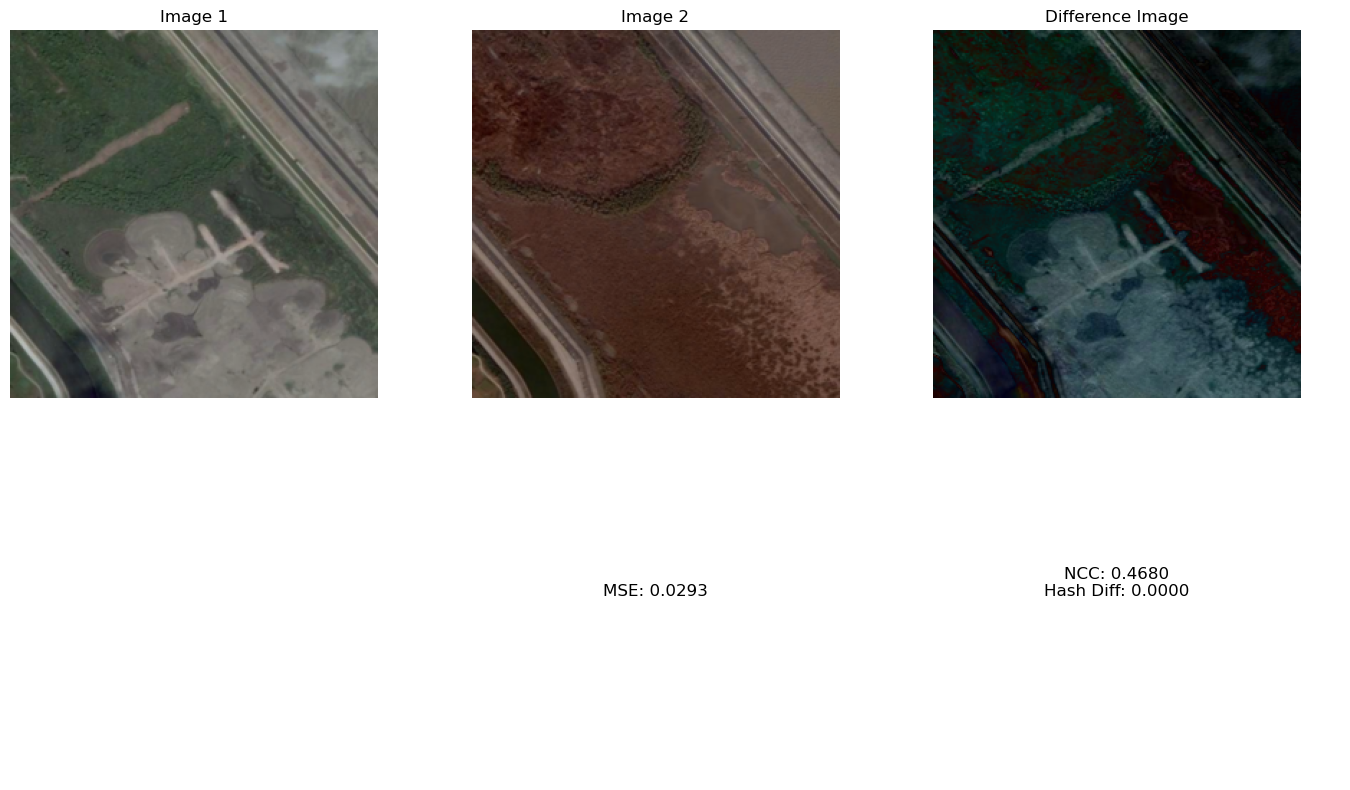

In [42]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.feature import match_template
import imagehash
from hashlib import sha256

class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Collecting image and label paths
        self.im1_dir = os.path.join(root_dir, 'im1')
        self.im2_dir = os.path.join(root_dir, 'im2')
        self.label1_dir = os.path.join(root_dir, 'label1')
        self.label2_dir = os.path.join(root_dir, 'label2')

        # Collecting file names
        self.im1_files = sorted([f for f in os.listdir(self.im1_dir) if f.endswith('.png')])
        self.im2_files = sorted([f for f in os.listdir(self.im2_dir) if f.endswith('.png')])
        self.label1_files = sorted([f for f in os.listdir(self.label1_dir) if f.endswith('.png')])
        self.label2_files = sorted([f for f in os.listdir(self.label2_dir) if f.endswith('.png')])

        # Ensure that the number of files in each directory matches
        if not (len(self.im1_files) == len(self.im2_files) == len(self.label1_files) == len(self.label2_files)):
            raise ValueError("Mismatch in the number of image and label files.")

    def __len__(self):
        return len(self.im1_files)  # Number of images

    def __getitem__(self, idx):
        im1_path = os.path.join(self.im1_dir, self.im1_files[idx])
        im2_path = os.path.join(self.im2_dir, self.im2_files[idx])
        label1_path = os.path.join(self.label1_dir, self.label1_files[idx])
        label2_path = os.path.join(self.label2_dir, self.label2_files[idx])

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Dataset and DataLoader
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Change Detection Algorithms
def difference_change_detection(im1, im2):
    return torch.abs(im1 - im2).squeeze(0).permute(1, 2, 0).numpy()

def ssim_change_detection(im1, im2):
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()
    
    # Determine window size dynamically
    min_dim = min(im1_np.shape[:2])
    win_size = min(7, min_dim)  # Ensure win_size does not exceed image dimensions

    ssim_index, _ = ssim(im1_np, im2_np, win_size=win_size, full=True, multichannel=True)
    return ssim_index

def mse_change_detection(im1, im2):
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()
    return mse(im1_np, im2_np)

def ncc_change_detection(im1, im2):
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()
    # Ensure window size is smaller than image dimensions
    win_size = min(im1_np.shape[:2]) // 2
    ncc = match_template(im1_np, im2_np, pad_input=True)
    return np.max(ncc)

def hashing_change_detection(im1, im2):
    def image_hash(image):
        return sha256(image.tobytes()).hexdigest()
    
    im1_hash = image_hash(Image.fromarray(im1.squeeze().permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    im2_hash = image_hash(Image.fromarray(im2.squeeze().permute(1, 2, 0).cpu().numpy().astype(np.uint8)))
    return np.abs(int(im1_hash, 16) - int(im2_hash, 16))

# Process Data and Display Results
for (im1, im2), (label1, label2) in dataloader:
    # Convert to numpy arrays for display
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()

    # Calculate metrics
    diff_img = difference_change_detection(im1, im2)
    # ssim_index = ssim_change_detection(im1, im2)
    mse_index = mse_change_detection(im1, im2)
    ncc_index = ncc_change_detection(im1, im2)
    hash_diff = hashing_change_detection(im1, im2)
    
    # Display Results
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 3, 1)
    plt.imshow(im1_np)
    plt.title("Image 1")
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(im2_np)
    plt.title("Image 2")
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(diff_img)
    plt.title("Difference Image")
    plt.axis('off')
    
    # plt.subplot(2, 3, 4)
    # plt.text(0.5, 0.5, f"SSIM Index: {ssim_index:.4f}", fontsize=12, ha='center')
    # plt.axis('off')
    
    plt.subplot(2, 3, 5)
    plt.text(0.5, 0.5, f"MSE: {mse_index:.4f}", fontsize=12, ha='center')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.text(0.5, 0.5, f"NCC: {ncc_index:.4f}\nHash Diff: {hash_diff:.4f}", fontsize=12, ha='center')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    break  # Remove break to process all images


In [43]:
# import os
# from PIL import Image
# import numpy as np
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, models
# import matplotlib.pyplot as plt
# import torch.nn as nn
# import torch.optim as optim
# from torchvision.models.segmentation import fcn_resnet50

# # Define Dataset
# class ChangeDetectionDataset(Dataset):
#     def __init__(self, root_dir, transform=None):
#         self.root_dir = root_dir
#         self.transform = transform
        
#         # Collecting image and label paths
#         self.im1_dir = os.path.join(root_dir, 'im1')
#         self.im2_dir = os.path.join(root_dir, 'im2')
#         self.label1_dir = os.path.join(root_dir, 'label1')
#         self.label2_dir = os.path.join(root_dir, 'label2')

#         # Collecting file names
#         self.im1_files = sorted([f for f in os.listdir(self.im1_dir) if f.endswith('.png')])
#         self.im2_files = sorted([f for f in os.listdir(self.im2_dir) if f.endswith('.png')])
#         self.label1_files = sorted([f for f in os.listdir(self.label1_dir) if f.endswith('.png')])
#         self.label2_files = sorted([f for f in os.listdir(self.label2_dir) if f.endswith('.png')])

#         # Ensure that the number of files in each directory matches
#         if not (len(self.im1_files) == len(self.im2_files) == len(self.label1_files) == len(self.label2_files)):
#             raise ValueError("Mismatch in the number of image and label files.")

#     def __len__(self):
#         return len(self.im1_files)  # Number of images

#     def __getitem__(self, idx):
#         im1_path = os.path.join(self.im1_dir, self.im1_files[idx])
#         im2_path = os.path.join(self.im2_dir, self.im2_files[idx])
#         label1_path = os.path.join(self.label1_dir, self.label1_files[idx])
#         label2_path = os.path.join(self.label2_dir, self.label2_files[idx])

#         im1 = Image.open(im1_path).convert("RGB")
#         im2 = Image.open(im2_path).convert("RGB")
#         label1 = Image.open(label1_path).convert("RGB")
#         label2 = Image.open(label2_path).convert("RGB")

#         if self.transform:
#             im1 = self.transform(im1)
#             im2 = self.transform(im2)
#             label1 = self.transform(label1)
#             label2 = self.transform(label2)

#         return (im1, im2), (label1, label2)

# # Transformation
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor()
# ])

# # Dataset and DataLoader
# root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
# dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
# dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# # Define CNN Model
# class SimpleCNN(nn.Module):
#     def __init__(self):
#         super(SimpleCNN, self).__init__()
#         self.conv1 = nn.Conv2d(6, 32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(64 * 64 * 64, 256)
#         self.fc2 = nn.Linear(256, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, im1, im2):
#         x = torch.cat((im1, im2), dim=1)
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 64 * 64)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return self.sigmoid(x)

# # Define U-Net Model
# class UNet(nn.Module):
#     def __init__(self):
#         super(UNet, self).__init__()
#         self.unet = models.segmentation.fcn_resnet50(pretrained=True)

#     def forward(self, im1, im2):
#         x = torch.cat((im1, im2), dim=1)
#         x = self.unet(x)['out']
#         return x

# # Define Siamese Network
# class SiameseNetwork(nn.Module):
#     def __init__(self):
#         super(SiameseNetwork, self).__init__()
#         self.cnn = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=10),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(2, stride=2),
#             nn.Conv2d(64, 128, kernel_size=7),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(2, stride=2),
#             nn.Conv2d(128, 128, kernel_size=4),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(2, stride=2),
#             nn.Conv2d(128, 256, kernel_size=4),
#             nn.ReLU(inplace=True)
#         )
#         self.fc = nn.Sequential(
#             nn.Linear(256 * 6 * 6, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, 256)
#         )

#     def forward_one(self, x):
#         x = self.cnn(x)
#         x = x.view(x.size()[0], -1)
#         x = self.fc(x)
#         return x

#     def forward(self, im1, im2):
#         output1 = self.forward_one(im1)
#         output2 = self.forward_one(im2)
#         return torch.norm(output1 - output2, p=2, dim=1)

# # Define ResNet-based Model
# class ResNetChangeDetection(nn.Module):
#     def __init__(self):
#         super(ResNetChangeDetection, self).__init__()
#         self.resnet = models.resnet34(pretrained=True)
#         self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

#     def forward(self, im1, im2):
#         im1 = self.resnet(im1)
#         im2 = self.resnet(im2)
#         return torch.abs(im1 - im2)

# # Define Feature Pyramid Network (FPN)
# class FPNChangeDetection(nn.Module):
#     def __init__(self):
#         super(FPNChangeDetection, self).__init__()
#         self.fpn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
#         in_features = self.fpn.roi_heads.in_features
#         self.fpn.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, 2)

#     def forward(self, im1, im2):
#         im1 = self.fpn(im1)[0]
#         im2 = self.fpn(im2)[0]
#         return torch.abs(im1['scores'] - im2['scores'])

# # Initialize Models
# cnn_model = SimpleCNN()
# unet_model = UNet()
# siamese_model = SiameseNetwork()
# resnet_model = ResNetChangeDetection()
# fpn_model = FPNChangeDetection()

# # Training and Testing Functions
# def train_and_test_model(model, dataloader):
#     model.train()
#     for (im1, im2), _ in dataloader:
#         output = model(im1, im2)
#         # Process output here (e.g., compute loss, update weights, etc.)
#         break  # For demonstration, we process only one batch

# # Display Results
# for (im1, im2), (label1, label2) in dataloader:
#     # Convert to numpy arrays for display
#     im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
#     im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()

#     # Run each model and get results
#     cnn_output = cnn_model(im1, im2)
#     unet_output = unet_model(im1, im2)
#     siamese_output = siamese_model(im1, im2)
#     resnet_output = resnet_model(im1, im2)
#     fpn_output = fpn_model(im1, im2)

#     # Display Results
#     plt.figure(figsize=(18, 10))
    
#     plt.subplot(3, 3, 1)
#     plt.imshow(im1_np)
#     plt.title


/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FCN_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /home/amehmood/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100%|████████████████████████████████████████████████████████████████████████████████| 135M/135M [00:11<00:00, 12.0MB/s]
/home/amehmood/anaconda3/envs/main_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to 

AttributeError: 'RoIHeads' object has no attribute 'in_features'

In [44]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

class FPNChangeDetection(nn.Module):
    def __init__(self):
        super(FPNChangeDetection, self).__init__()
        self.fpn = fasterrcnn_resnet50_fpn(pretrained=True)
        # Use the pretrained weights without modification for the box predictor

    def forward(self, im1, im2):
        # Pass images through FPN model
        im1_results = self.fpn([im1])
        im2_results = self.fpn([im2])

        # For simplicity, compare the scores from the predictions
        im1_scores = im1_results[0]['scores']
        im2_scores = im2_results[0]['scores']
        
        # Assume the comparison is based on detected object scores
        diff = torch.abs(im1_scores - im2_scores)
        return diff


In [45]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.models.segmentation import fcn_resnet50

# Define Dataset
class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Collecting image and label paths
        self.im1_dir = os.path.join(root_dir, 'im1')
        self.im2_dir = os.path.join(root_dir, 'im2')
        self.label1_dir = os.path.join(root_dir, 'label1')
        self.label2_dir = os.path.join(root_dir, 'label2')

        # Collecting file names
        self.im1_files = sorted([f for f in os.listdir(self.im1_dir) if f.endswith('.png')])
        self.im2_files = sorted([f for f in os.listdir(self.im2_dir) if f.endswith('.png')])
        self.label1_files = sorted([f for f in os.listdir(self.label1_dir) if f.endswith('.png')])
        self.label2_files = sorted([f for f in os.listdir(self.label2_dir) if f.endswith('.png')])

        # Ensure that the number of files in each directory matches
        if not (len(self.im1_files) == len(self.im2_files) == len(self.label1_files) == len(self.label2_files)):
            raise ValueError("Mismatch in the number of image and label files.")

    def __len__(self):
        return len(self.im1_files)  # Number of images

    def __getitem__(self, idx):
        im1_path = os.path.join(self.im1_dir, self.im1_files[idx])
        im2_path = os.path.join(self.im2_dir, self.im2_files[idx])
        label1_path = os.path.join(self.label1_dir, self.label1_files[idx])
        label2_path = os.path.join(self.label2_dir, self.label2_files[idx])

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Dataset and DataLoader
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Define CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(6, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64 * 64, 256)
        self.fc2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)

# Define U-Net Model
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.unet = fcn_resnet50(pretrained=True)

    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)
        x = self.unet(x)['out']
        return x

# Define Siamese Network
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=10),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(64, 128, kernel_size=7),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 128, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 256)
        )

    def forward_one(self, x):
        x = self.cnn(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, im1, im2):
        output1 = self.forward_one(im1)
        output2 = self.forward_one(im2)
        return torch.norm(output1 - output2, p=2, dim=1)

# Define ResNet-based Model
class ResNetChangeDetection(nn.Module):
    def __init__(self):
        super(ResNetChangeDetection, self).__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

    def forward(self, im1, im2):
        im1 = self.resnet(im1)
        im2 = self.resnet(im2)
        return torch.abs(im1 - im2)

# Define Feature Pyramid Network (FPN)
class FPNChangeDetection(nn.Module):
    def __init__(self):
        super(FPNChangeDetection, self).__init__()
        self.fpn = fasterrcnn_resnet50_fpn(pretrained=True)

    def forward(self, im1, im2):
        # Pass images through FPN model
        im1_results = self.fpn([im1])
        im2_results = self.fpn([im2])

        # For simplicity, compare the scores from the predictions
        im1_scores = im1_results[0]['scores']
        im2_scores = im2_results[0]['scores']
        
        # Assume the comparison is based on detected object scores
        diff = torch.abs(im1_scores - im2_scores)
        return diff

# Initialize Models
cnn_model = SimpleCNN()
unet_model = UNet()
siamese_model = SiameseNetwork()
resnet_model = ResNetChangeDetection()
fpn_model = FPNChangeDetection()

# Training and Testing Functions
def train_and_test_model(model, dataloader):
    model.train()
    for (im1, im2), _ in dataloader:
        output = model(im1, im2)
        # Process output here (e.g., compute loss, update weights, etc.)
        break  # For demonstration, we process only one batch

# Display Results
for (im1, im2), (label1, label2) in dataloader:
    # Convert to numpy arrays for display
    im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()

    # Run each model and get results
    cnn_output = cnn_model(im1, im2)
    unet_output = unet_model(im1, im2)
    siamese_output = siamese_model(im1, im2)
    resnet_output = resnet_model(im1, im2)
    fpn_output = fpn_model(im1, im2)

    # Display Results
    plt.figure(figsize=(18, 10))
    
    plt.subplot(3, 3, 1)
    plt.imshow(im1_np)
    plt.title('Image 1')
    
    plt.subplot(3, 3, 2)
    plt.imshow(im2_np)
    plt.title('Image 2')

    # Add more plots for model outputs as needed
    plt.show()


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 6, 256, 256] to have 3 channels, but got 6 channels instead

In [46]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(6, 32, kernel_size=3, padding=1)  # Changed input channels to 6
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64 * 64, 256)
        self.fc2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)  # Concatenate along the channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)


In [47]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=10),  # Changed input channels to 6
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(64, 128, kernel_size=7),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 128, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 256)
        )

    def forward_one(self, x):
        x = self.cnn(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, im1, im2):
        output1 = self.forward_one(im1)
        output2 = self.forward_one(im2)
        return torch.norm(output1 - output2, p=2, dim=1)


In [48]:
class ResNetChangeDetection(nn.Module):
    def __init__(self):
        super(ResNetChangeDetection, self).__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Changed input channels to 6
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

    def forward(self, im1, im2):
        im1 = self.resnet(im1)
        im2 = self.resnet(im2)
        return torch.abs(im1 - im2)


In [49]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.models.segmentation import fcn_resnet50

# Define Dataset
class ChangeDetectionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Collecting image and label paths
        self.im1_dir = os.path.join(root_dir, 'im1')
        self.im2_dir = os.path.join(root_dir, 'im2')
        self.label1_dir = os.path.join(root_dir, 'label1')
        self.label2_dir = os.path.join(root_dir, 'label2')

        # Collecting file names
        self.im1_files = sorted([f for f in os.listdir(self.im1_dir) if f.endswith('.png')])
        self.im2_files = sorted([f for f in os.listdir(self.im2_dir) if f.endswith('.png')])
        self.label1_files = sorted([f for f in os.listdir(self.label1_dir) if f.endswith('.png')])
        self.label2_files = sorted([f for f in os.listdir(self.label2_dir) if f.endswith('.png')])

        # Ensure that the number of files in each directory matches
        if not (len(self.im1_files) == len(self.im2_files) == len(self.label1_files) == len(self.label2_files)):
            raise ValueError("Mismatch in the number of image and label files.")

    def __len__(self):
        return len(self.im1_files)  # Number of images

    def __getitem__(self, idx):
        im1_path = os.path.join(self.im1_dir, self.im1_files[idx])
        im2_path = os.path.join(self.im2_dir, self.im2_files[idx])
        label1_path = os.path.join(self.label1_dir, self.label1_files[idx])
        label2_path = os.path.join(self.label2_dir, self.label2_files[idx])

        im1 = Image.open(im1_path).convert("RGB")
        im2 = Image.open(im2_path).convert("RGB")
        label1 = Image.open(label1_path).convert("RGB")
        label2 = Image.open(label2_path).convert("RGB")

        if self.transform:
            im1 = self.transform(im1)
            im2 = self.transform(im2)
            label1 = self.transform(label1)
            label2 = self.transform(label2)

        return (im1, im2), (label1, label2)

# Transformation
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Dataset and DataLoader
root_dir = '/mnt/d/FY2024/DataSet2024/SatelitteChangeDetection'
dataset = ChangeDetectionDataset(root_dir=root_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Define CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(6, 32, kernel_size=3, padding=1)  # Changed input channels to 6
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 64 * 64, 256)
        self.fc2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)  # Concatenate along the channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)

# Define U-Net Model
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.unet = fcn_resnet50(pretrained=True)

    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)
        x = self.unet(x)['out']
        return x

# Define Siamese Network Model
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=10),  # Changed input channels to 6
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(64, 128, kernel_size=7),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 128, kernel_size=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(128, 256, kernel_size=4),
            nn.ReLU(inplace=True)
        )
        self.fc = nn.Sequential(
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 256)
        )

    def forward_one(self, x):
        x = self.cnn(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, im1, im2):
        output1 = self.forward_one(im1)
        output2 = self.forward_one(im2)
        return torch.norm(output1 - output2, p=2, dim=1)

# Define ResNet Model
class ResNetChangeDetection(nn.Module):
    def __init__(self):
        super(ResNetChangeDetection, self).__init__()
        self.resnet = models.resnet34(pretrained=True)
        self.resnet.conv1 = nn.Conv2d(6, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Changed input channels to 6
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 1)

    def forward(self, im1, im2):
        im1 = self.resnet(im1)
        im2 = self.resnet(im2)
        return torch.abs(im1 - im2)

# Define FPN Model
class FPNChangeDetection(nn.Module):
    def __init__(self):
        super(FPNChangeDetection, self).__init__()
        self.fpn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        in_features = self.fpn.roi_heads.in_features
        self.fpn.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, 2)

    def forward(self, im1, im2):
        im1 = self.fpn(im1)
        im2 = self.fpn(im2)
        return torch.abs(im1 - im2)

# Models instantiation
cnn_model = SimpleCNN()
unet_model = UNet()
siamese_model = SiameseNetwork()
resnet_model = ResNetChangeDetection()
fpn_model = FPNChangeDetection()

# Training and Testing Functions
def train_and_test_model(model, dataloader):
    model.eval()
    for (im1, im2), (label1, label2) in dataloader:
        im1 = im1.cuda()
        im2 = im2.cuda()
        output = model(im1, im2)
        
        # Display results
        im1_np = im1.squeeze().permute(1, 2, 0).cpu().numpy()
        im2_np = im2.squeeze().permute(1, 2, 0).cpu().numpy()
        output_np = output.squeeze().cpu().numpy()

        plt.figure(figsize=(18, 10))
        plt.subplot(3, 3, 1)
        plt.imshow(im1_np)
        plt.title('Image 1')
        
        plt.subplot(3, 3, 2)
        plt.imshow(im2_np)
        plt.title('Image 2')
        
        plt.subplot(3, 3, 3)
        plt.imshow(output_np)
        plt.title('Change Detection Output')
        
        plt.show()

# Test each model
train_and_test_model(cnn_model, dataloader)
train_and_test_model(unet_model, dataloader)
train_and_test_model(siamese_model, dataloader)
train_and_test_model(resnet_model, dataloader)
train_and_test_model(fpn_model, dataloader)


AttributeError: 'RoIHeads' object has no attribute 'in_features'

In [50]:
import torch
import torch.nn as nn
from torchvision import models

class FPNChangeDetection(nn.Module):
    def __init__(self):
        super(FPNChangeDetection, self).__init__()
        self.fpn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
        # Override the box predictor with a custom one for binary classification
        in_features = self.fpn.roi_heads.box_predictor.in_features
        self.fpn.roi_heads.box_predictor = models.detection.faster_rcnn.FastRCNNPredictor(in_features, 2)

    def forward(self, im1, im2):
        # Concatenate images along the channel dimension
        im1 = torch.cat((im1, im2), dim=1)  # Change this if needed
        # Use FPN model for feature extraction
        outputs = self.fpn(im1)
        # For demonstration, using 'scores' and 'labels' to illustrate; adapt according to your need
        scores = outputs[0]['scores']
        labels = outputs[0]['labels']
        return scores, labels

# Instantiate the model
fpn_model = FPNChangeDetection()

# Define a function to visualize results
def visualize_results(images, outputs):
    im1_np = images[0].squeeze().permute(1, 2, 0).cpu().numpy()
    im2_np = images[1].squeeze().permute(1, 2, 0).cpu().numpy()
    plt.figure(figsize=(18, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(im1_np)
    plt.title('Image 1')
    plt.subplot(1, 3, 2)
    plt.imshow(im2_np)
    plt.title('Image 2')
    plt.subplot(1, 3, 3)
    plt.title('FPN Output')
    plt.text(0.5, 0.5, 'Scores and Labels', horizontalalignment='center', verticalalignment='center')
    plt.show()

# Example usage
for (im1, im2), _ in dataloader:
    im1 = im1.cuda()
    im2 = im2.cuda()
    scores, labels = fpn_model(im1, im2)
    visualize_results((im1, im2), (scores, labels))
    break  # Remove this break to process all data


AttributeError: 'FastRCNNPredictor' object has no attribute 'in_features'

CNN Predictions: [[1.]]
CNN Labels: [[1.]]


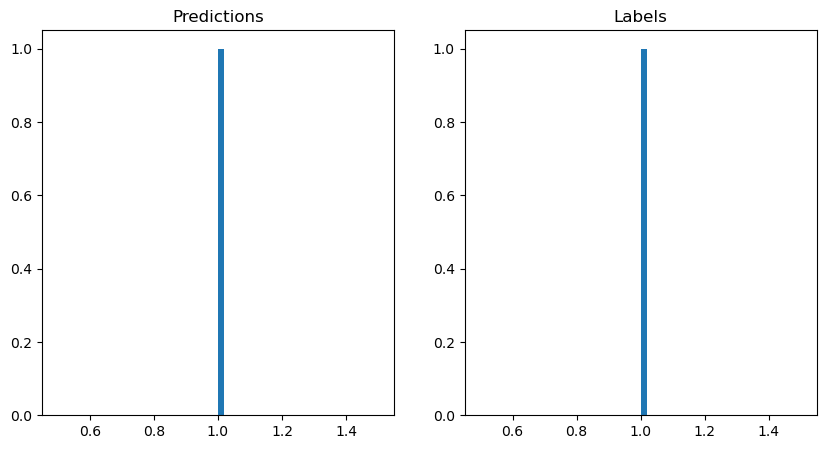

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(6, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 64 * 64, 1024)
        self.fc2 = nn.Linear(1024, 1)
    
    def forward(self, im1, im2):
        x = torch.cat((im1, im2), dim=1)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training and Testing
def train_and_evaluate_cnn(model, dataloader, num_epochs=1):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    model.train()
    for epoch in range(num_epochs):
        for (im1, im2), (label1, label2) in dataloader:
            im1, im2 = im1.cuda(), im2.cuda()
            labels = torch.ones(im1.size(0), 1).cuda()  # Dummy labels
            
            optimizer.zero_grad()
            outputs = model(im1, im2)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
    # Evaluate
    model.eval()
    with torch.no_grad():
        for (im1, im2), (label1, label2) in dataloader:
            im1, im2 = im1.cuda(), im2.cuda()
            outputs = model(im1, im2)
            preds = torch.sigmoid(outputs).cpu().numpy()
            # Use metrics to assess performance
            break

    return preds, labels.cpu().numpy()

# Example usage
cnn_model = SimpleCNN().cuda()
preds, labels = train_and_evaluate_cnn(cnn_model, dataloader)

# Numerical Results
print("CNN Predictions:", preds)
print("CNN Labels:", labels)

# Graphical Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Predictions')
plt.hist(preds, bins=50)
plt.subplot(1, 2, 2)
plt.title('Labels')
plt.hist(labels, bins=50)
plt.show()
